# Predicting 2021 COVID cases using Time-Series

### Context

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization
The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.


I use Time series analysis to understand the data better and to answer many questions which may arise.

So what is Time Series?

1. A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.
2. An observed time series can be decomposed into three components:
   * the trend (long term direction)
   * the seasonal (systematic, calendar related movements) 
   * the irregular (unsystematic, short term fluctuations).
3. Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals.

How to do a time series analysis?

* Step 1: Visualize the Time Series.It is essential to analyze the trends prior to building any kind of time series model.
* Step 2: Stationarize/Decompose the Series.
* Step 3: Find Optimal Parameters.
* Step 4: Build ARIMA Model.
* Step 5: Make Predictions.

In [392]:
import pandas as pd                      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [393]:
df = pd.read_csv("G:\DATASCIENCE\ds_projects\covid_19\covid_19_india.csv")

In [394]:
print(df.shape)
df.head(5)


(9291, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [395]:
df.iloc[0]

Sno                                1
Date                        30/01/20
Time                         6:00 PM
State/UnionTerritory          Kerala
ConfirmedIndianNational            1
ConfirmedForeignNational           0
Cured                              0
Deaths                             0
Confirmed                          1
Name: 0, dtype: object

## Data wrangling/preprocessing

In [396]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [397]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [398]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [400]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [401]:
df.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.432994,0.290920,0.425833
Cured,0.432994,1.000000,0.893227,0.995012
Deaths,0.290920,0.893227,1.000000,0.913777
Confirmed,0.425833,0.995012,0.913777,1.000000


In [402]:
print(df['Cured'].unique())

[     0      3      1 ...  72435 528832 475425]


In [403]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [404]:
len(df['State/UnionTerritory'].unique())

45

### you see that we have so many dublicates that ending with '***' , we can drop or replace them if we want
### I'm droping 

In [405]:
for i in df['State/UnionTerritory'].iteritems():
    if i[1][-3:]=="***":
        df.drop(i[0],inplace=True)

In [406]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

In [407]:
len(df['State/UnionTerritory'].unique())

40

### In above we can also notice "Telenagana" and "Telangana" which both are same state ,but just a spelling mistake.
### so we can replace all the name with "Telengana" to "Telangana" so our visualization will be more accurate.

In [408]:
df = df.replace(to_replace ="Telengana", value ="Telangana")

In [409]:
df['State/UnionTerritory'].unique()

#now u can see "Telangana" is replaced with "Telangana" in the row, that why u cant see "Telangana"

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [410]:
len(df['State/UnionTerritory'].unique())

39

## Data Visualization

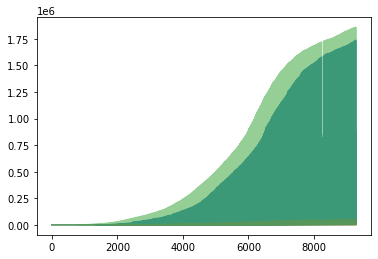

In [411]:
df['Cured'].plot(alpha=0.8)
df['Deaths'].plot(alpha=0.3)
df['Confirmed'].plot(alpha=0.5)
plt.show()


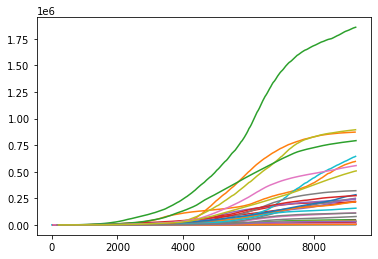

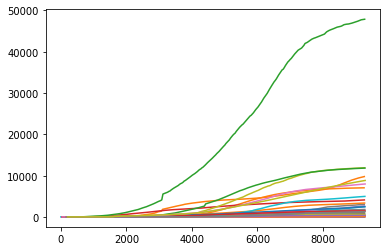

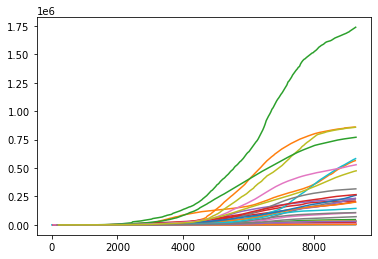

In [412]:
df.groupby('State/UnionTerritory')['Confirmed'].plot()
plt.show()
df.groupby('State/UnionTerritory')['Deaths'].plot()
plt.show()
df.groupby('State/UnionTerritory')['Cured'].plot()
plt.show()

In [413]:
##adding data and time and creating a new column "Datetime" for our convinience for better visualization
df['Datetime'] = df['Date']+' '+df['Time']


In [414]:
l = df.groupby('State/UnionTerritory')
current = l.last()
print(current)


                                           Sno      Date     Time  \
State/UnionTerritory                                                
Andaman and Nicobar Islands               9257  09/12/20  8:00 AM   
Andhra Pradesh                            9258  09/12/20  8:00 AM   
Arunachal Pradesh                         9259  09/12/20  8:00 AM   
Assam                                     9260  09/12/20  8:00 AM   
Bihar                                     9261  09/12/20  8:00 AM   
Cases being reassigned to states          4251  18/07/20  8:00 AM   
Chandigarh                                9262  09/12/20  8:00 AM   
Chhattisgarh                              9263  09/12/20  8:00 AM   
Dadar Nagar Haveli                        2890  11/06/20  8:00 AM   
Dadra and Nagar Haveli and Daman and Diu  9264  09/12/20  8:00 AM   
Daman & Diu                               2891  11/06/20  8:00 AM   
Delhi                                     9265  09/12/20  8:00 AM   
Goa                               

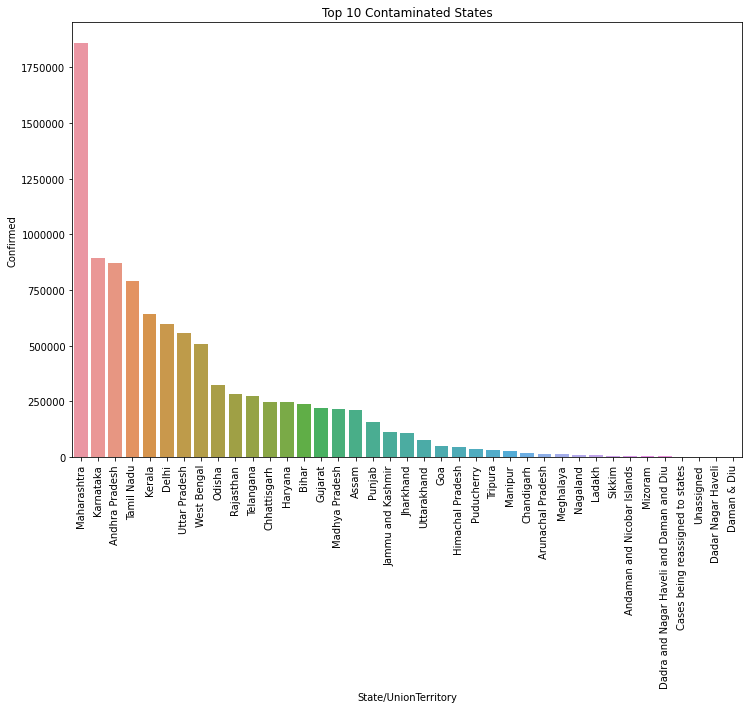

In [424]:
fig ,ax = plt.subplots(figsize= (12,8))
plt.title('Top 10 Contaminated States')
current1 = current.sort_values("Confirmed",ascending=False)
p = sns.barplot(ax=ax, x=current1.index, y=current1['Confirmed'])
p.set_xticklabels(labels=current1.index, rotation=90)
p.set_yticklabels(labels=(p.get_yticks()*1).astype(int))
plt.show()

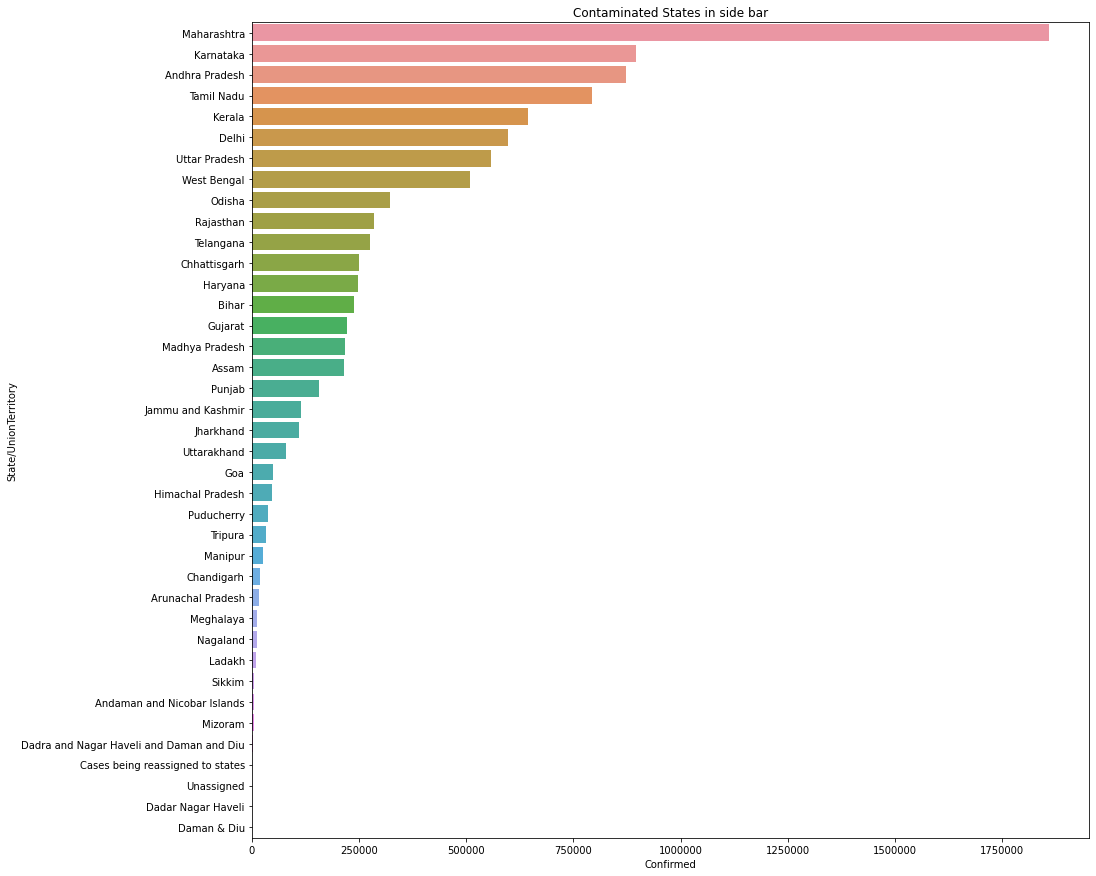

In [425]:
fig ,ax = plt.subplots(figsize= (15,15))
plt.title('Contaminated States in side bar')

P = sns.barplot(ax=ax,y= current1.index, x=current1['Confirmed'])
P.set_yticklabels(labels=current1.index)
P.set_xticklabels(labels=(P.get_xticks()*1).astype(int))
plt.show()

### now we will only see top 10 contaminated 

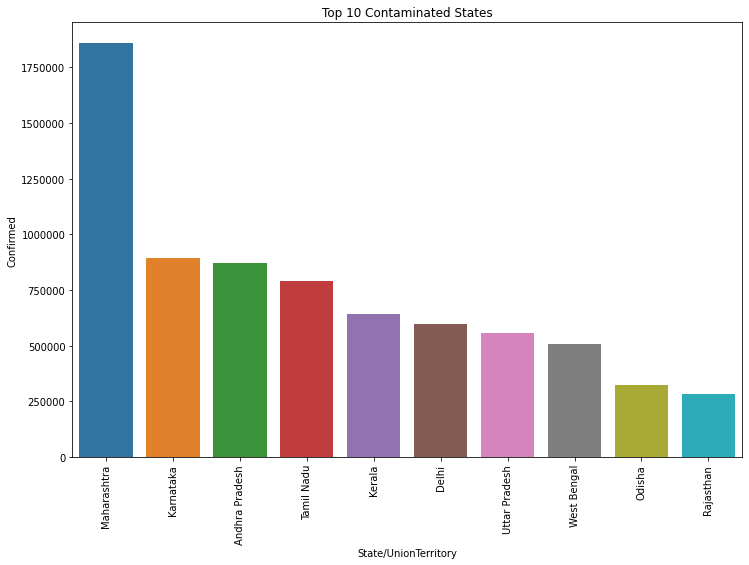

In [426]:
fig ,ax = plt.subplots(figsize= (12,8))
plt.title('Top 10 Contaminated States')

current2 = current.sort_values("Confirmed", ascending=False)[:10]

p = sns.barplot(ax=ax, x=current2.index, y=current2['Confirmed'])
p.set_xticklabels(labels=current2.index, rotation=90)
p.set_yticklabels(labels=(p.get_yticks()*1).astype(int))
plt.show()

### now we will only see top 10 states with cured ppl

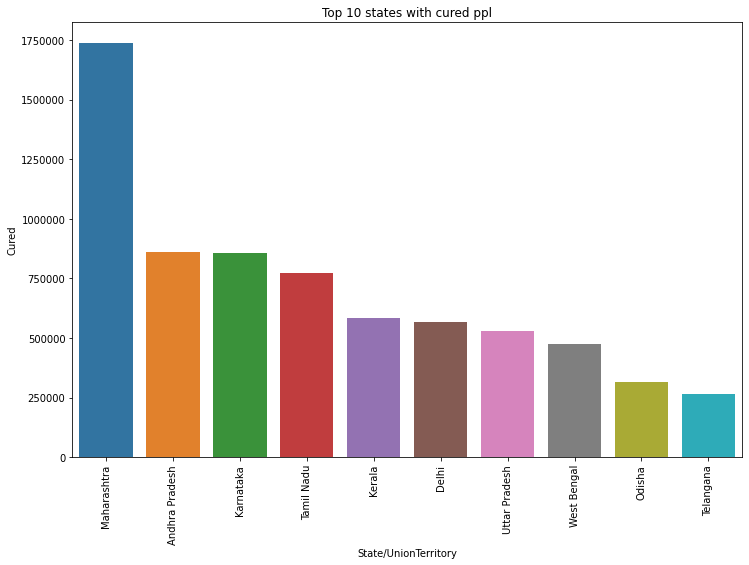

In [427]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Top 10 states with cured ppl")
current3 = current.sort_values("Cured", ascending=False)[:10]

p1 = sns.barplot(ax=ax, x=current3.index, y=current3["Cured"])
p1.set_xticklabels(labels=current3.index, rotation=90)
p1.set_yticklabels(labels=(p1.get_yticks()*1).astype(int))
plt.show()



### now we will only see top 10 states with dead ppl

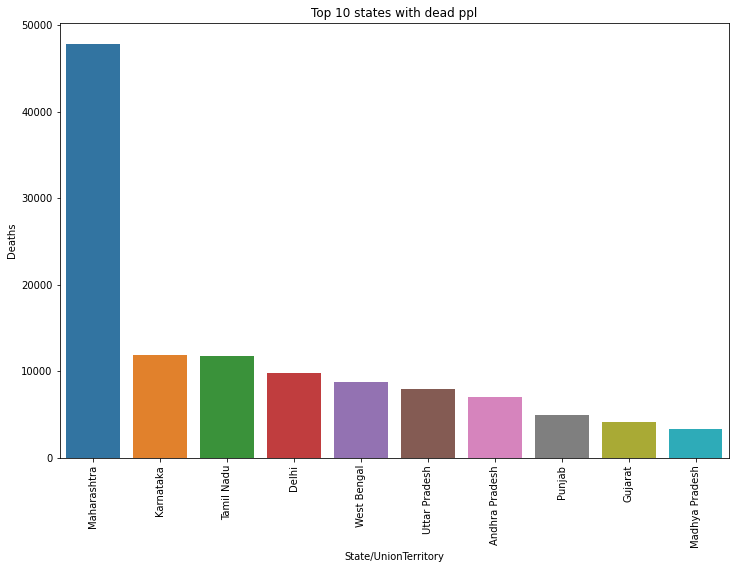

In [428]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Top 10 states with dead ppl")
current4 = current.sort_values("Deaths", ascending=False)[:10]

p1 = sns.barplot(ax=ax, x=current4.index, y=current4["Deaths"])
p1.set_xticklabels(labels=current4.index, rotation=90)
p1.set_yticklabels(labels=(p1.get_yticks()*1).astype(int))
plt.show()


* so from above we can conclude that Maharashtra is 1st in confirmed cases , cured and deaths.
* we can also see that "Andhra Pradesh" is 3nd in confirmed cases but it is at 2nd place in cured and 7th     place in deaths which is actuallyimpressive.
* we can also see that orisa is doing better rajastan with less deaths.

## Time Series Analysis For 'Telangana' State

In [441]:
TS = df.loc[df['State/UnionTerritory'] == 'Telangana' ]

In [442]:
TS.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Datetime
32,33,02/03/20,6:00 PM,Telangana,1,0,0,0,1,02/03/20 6:00 PM
35,36,03/03/20,6:00 PM,Telangana,1,0,0,0,1,03/03/20 6:00 PM
43,44,04/03/20,6:00 PM,Telangana,1,0,0,0,1,04/03/20 6:00 PM
49,50,05/03/20,6:00 PM,Telangana,1,0,0,0,1,05/03/20 6:00 PM
56,57,06/03/20,6:00 PM,Telangana,1,0,0,0,1,06/03/20 6:00 PM


In [443]:
TS.shape

(281, 10)

In [444]:
TS.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Datetime                    0
dtype: int64

In [445]:
TS['Date'] = pd.to_datetime(TS['Date'])

In [446]:
TS.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Datetime
32,33,2020-02-03,6:00 PM,Telangana,1,0,0,0,1,02/03/20 6:00 PM
35,36,2020-03-03,6:00 PM,Telangana,1,0,0,0,1,03/03/20 6:00 PM
43,44,2020-04-03,6:00 PM,Telangana,1,0,0,0,1,04/03/20 6:00 PM
49,50,2020-05-03,6:00 PM,Telangana,1,0,0,0,1,05/03/20 6:00 PM
56,57,2020-06-03,6:00 PM,Telangana,1,0,0,0,1,06/03/20 6:00 PM


In [447]:
TS.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'Datetime'],
      dtype='object')

### dropping all the unneccesry columns except confirmed and datetime

In [448]:
cols = ['Sno', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Date']
TS.drop(cols, axis=1, inplace=True)

In [449]:
TS= TS.sort_values('Datetime')
TS.isnull().sum()

Confirmed    0
Datetime     0
dtype: int64

In [450]:
TS.head()

,Confirmed,Datetime
554,96,01/04/20 7:30 PM
1505,1039,01/05/20 5:00 PM
2552,2698,01/06/20 8:00 AM
3633,16339,01/07/20 8:00 AM
4736,62703,01/08/20 8:00 AM



* converting datatime column type(if it is a 'string type' it will convert to 'datetime' type) and 
* setting date as our index

In [453]:
TS.Datetime = pd.to_datetime(df.Datetime)
TS.set_index('Datetime', inplace=True)

### converting daily data into weekly data

In [454]:
TS=TS.resample('W').sum()

In [455]:
TS.head()

,Confirmed
Datetime,
2020-01-05,1135
2020-01-12,913403
2020-01-19,0
2020-01-26,0
2020-02-02,0


In [456]:
TS.tail()

,Confirmed
Datetime,
2020-11-15,1388066
2020-11-22,1825221
2020-11-29,1867429
2020-12-06,275916
2020-12-13,740576


In [458]:
TS.shape

(50, 1)

In [459]:
TS.isnull().sum()

Confirmed    0
dtype: int64

#### Now lets plot a graph showing the increasing trend and seasonality in the data

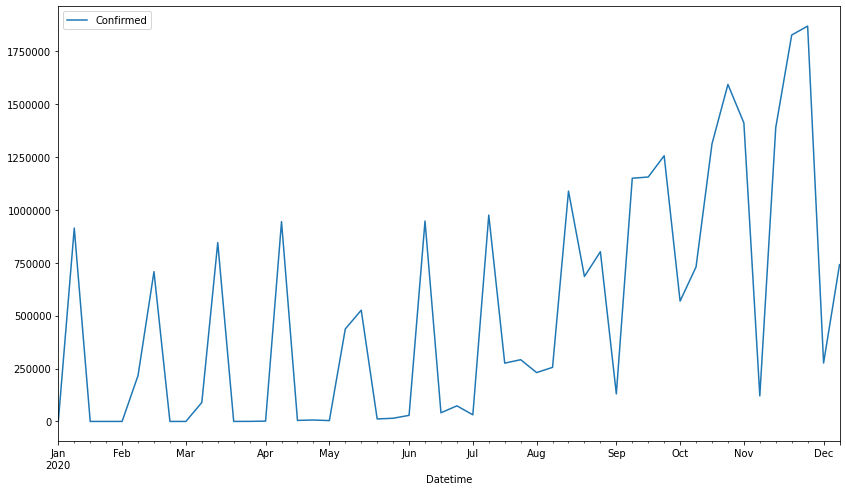

In [460]:
plot_ts = TS.plot(figsize=(14,8))

plot_ts.set_yticklabels(labels=(plot_ts.get_yticks()*1).astype(int))
plt.legend()
plt.show()

#### Now lets plot the Decomposition Plot which shows :

* orignal data
* Trend in the data
* Seasonality
* Residual


### But why do we decompose time series?
When we decompose a time series into components, we usually combine the trend and cycle into a single trend-cycle component (sometimes called the trend for simplicity). Often this is done to help improve understanding of the time series, but it can also be used to improve forecast accuracy.


### Types of decomposition :
* Multiplicative : The components multiply together to make the time series. If you have an increasing        trend, the amplitude of seasonal activity increases. Everything becomes more exaggerated.
* Additive : In an additive time series, the components add together to make the time series.
  (Here we used Additive)

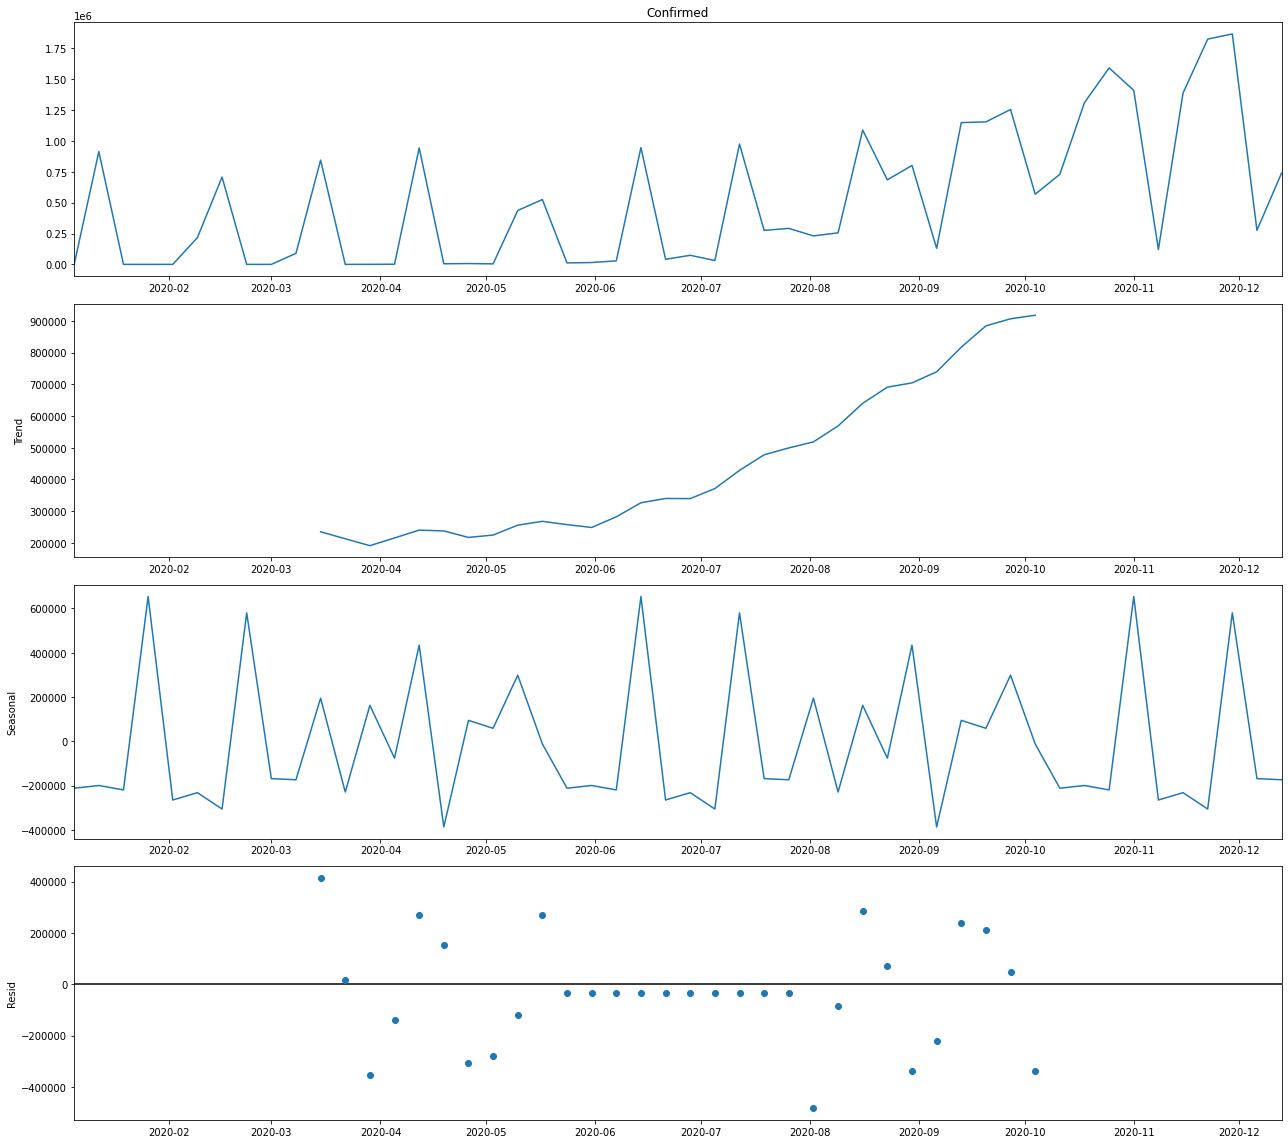

In [462]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 16
decomposition = sm.tsa.seasonal_decompose(TS['Confirmed'], freq = 20, model='additive')
fig = decomposition.plot()

plt.show()

# Implementing SARIMAx

(We used SARIMAX)

-> Seasonal AutoRegressive Integrated Moving Averages:

     One of the methods available in Python to model and predict future points of a time series is known as SARIMAX, which stands for Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors

-> What does an Arima model do?

    Autoregressive Integrated Moving Average Model. An ARIMA model is a class of statistical models for    analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

-> How to select perfect ARIMA model?

    Rules for identifying ARIMA models. General seasonal models: ARIMA (0,1,1)x(0,1,1) etc. Identifying the order of differencing and the constant: If the series has positive autocorrelations out to a high number of lags (say, 10 or more), then it probably needs a higher order of differencing.

* we are using order=(p, d, q)=(1,1,1) becaz usally (1,1,1) or (0,1,1) both will give best results.

* In seasional order we are use extxa value "4" becaze we are comparing a season ,where here it is 4 weeks


## Preparing Model

In [463]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(TS['Confirmed'], order = (1,1,1), seasonal_order=(1,1,1,4))
results = model.fit()



 ### testing our model

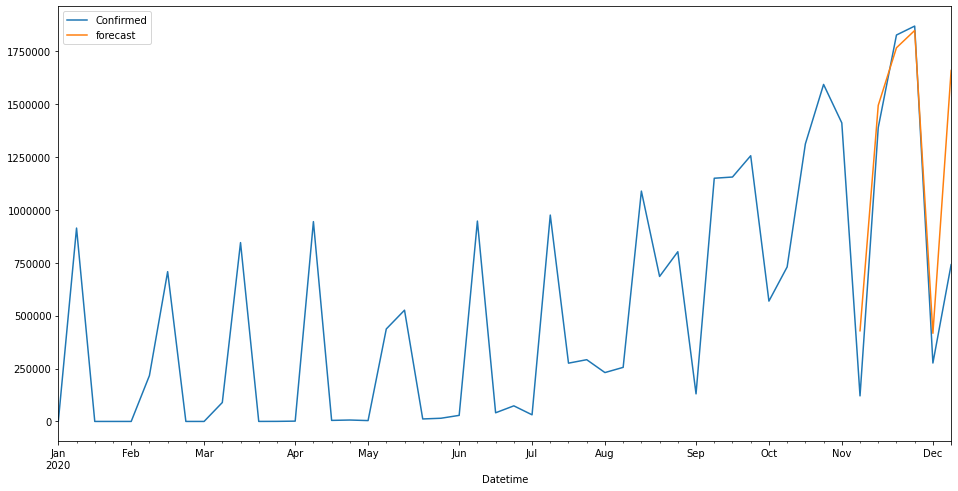

In [464]:
TS['forecast'] = results.predict(start=44, end =50, dynamic=True)
ax = TS[['Confirmed','forecast']].plot(figsize=(16,8))

ax.set_yticklabels(labels=(ax.get_yticks()*1).astype(int))
plt.legend()
plt.show()

## preparing  DATA Future prediction

### Here we created a new "future_data_ts" which has weekly dates of 2021

In [477]:
from pandas.tseries.offsets import DateOffset


future_dates = [ TS.index[-1]+DateOffset(weeks=x) for x in range(0,53) ]
future_data_TS = pd.DataFrame(index=future_dates[1:], columns = TS.columns)


In [478]:
future_data_TS.tail()

,Confirmed,forecast
2021-11-14,NaN,NaN
2021-11-21,NaN,NaN
2021-11-28,NaN,NaN
2021-12-05,NaN,NaN
2021-12-12,NaN,NaN


### Now coombine "future_data_TS" with "TS" to get a new "future_TS" data set

In [479]:
future_TS = pd.concat([TS, future_data_TS])

In [480]:
future_TS.head()

,Confirmed,forecast
2020-01-05,1135,NaN
2020-01-12,913403,NaN
2020-01-19,0,NaN
2020-01-26,0,NaN
2020-02-02,0,NaN


In [481]:
future_TS.tail()

,Confirmed,forecast
2021-11-14,NaN,NaN
2021-11-21,NaN,NaN
2021-11-28,NaN,NaN
2021-12-05,NaN,NaN
2021-12-12,NaN,NaN


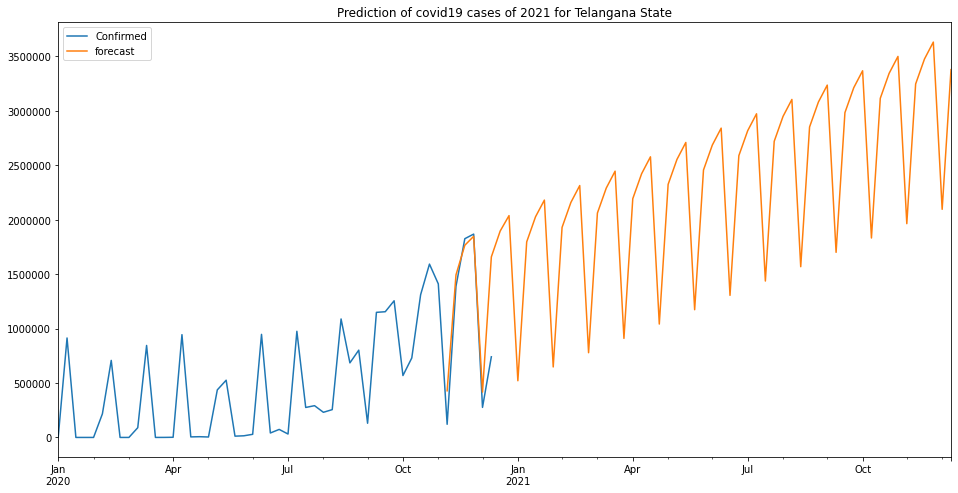

In [483]:
future_TS['forecast'] = results.predict(start=44, end = pd.to_datetime('2021-12-12'), dynamic=True)


ax = future_TS[['Confirmed','forecast']].plot(figsize=(16,8))
plt.title("Prediction of covid19 cases of 2021 for Telangana State")
ax.set_yticklabels(labels=(ax.get_yticks()*1).astype(int))	
plt.legend()
plt.show()